In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import umap

2022-11-26 13:26:17.252028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 13:26:17.712117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 13:26:17.712143: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-26 13:26:19.497535: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df = df.drop_duplicates()
X = df.iloc[:,:16]
y = df.iloc[:,16:]
y = y.reset_index().drop(columns = "index")
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
pt = PowerTransformer(method = "yeo-johnson")
X = pd.DataFrame(pt.fit_transform(X), columns = X.columns)

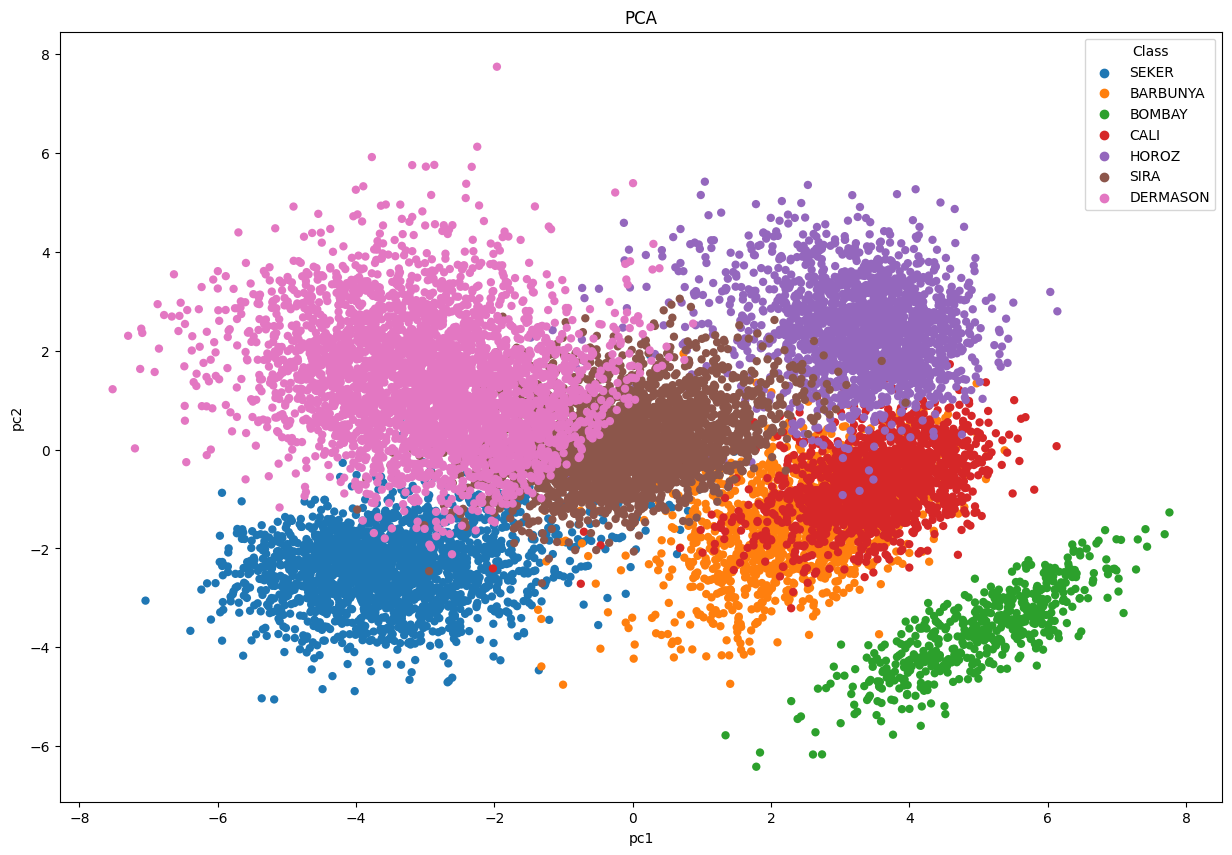

In [3]:
plt.figure(figsize = (15,10))
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
pca_fit = pd.DataFrame(data = {"pc1":pc[:,0], "pc2":pc[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='pc1', y='pc2', data=pca_fit, hue='Class', ec=None).set(title='PCA')
plt.savefig("PCA.jpg", dpi = 600)
plt.show()

/home/matthias/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/matthias/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


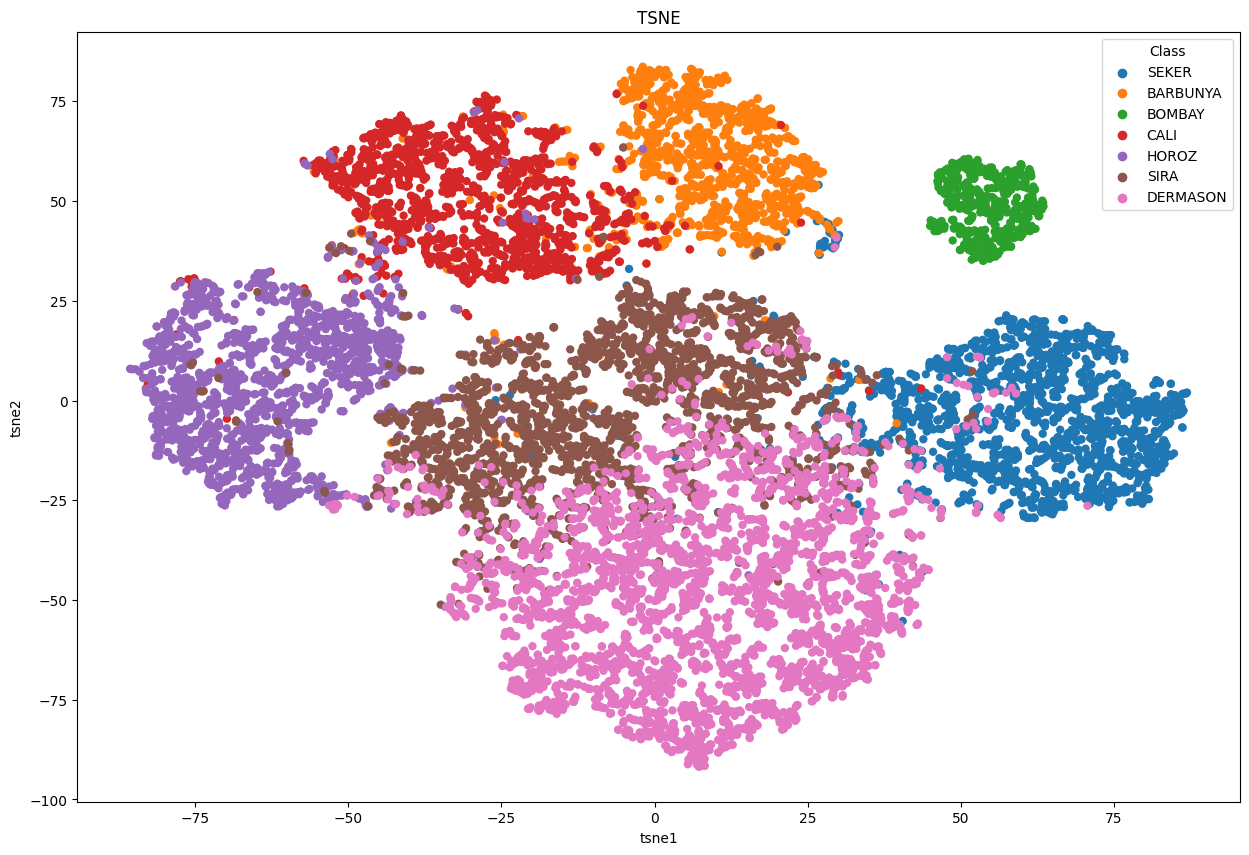

In [4]:
plt.figure(figsize = (15,10))
X_embedded = TSNE(n_components=2, n_jobs = -1, random_state = 101).fit_transform(X)
tsne_fit = pd.DataFrame(data = {"tsne1":X_embedded[:,0], "tsne2":X_embedded[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='tsne1', y='tsne2', data=tsne_fit, hue='Class', ec=None).set(title='TSNE')
plt.savefig("TSNE.jpg", dpi = 600)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
reducer = umap.UMAP(random_state = 101, learning_rate = 0.25, n_epochs = 1000)
embedding = reducer.fit_transform(X)
umap_fit = pd.DataFrame(data = {"umap1":embedding[:,0], "umap2":embedding[:,1],"Class":np.ravel(y.values)})
plot = sns.scatterplot(x='umap1', y='umap2', data=umap_fit, hue='Class', ec=None).set(title='UMAP')
plt.savefig("UMAP.jpg", dpi = 600)
plt.show()